In [2]:
import sys
import os
from tqdm import tqdm

DIR_ROOT = 'D:\\LAA_STROKE'
DIR_CODE = os.path.join(DIR_ROOT, 'code', 'BAH-DICOM-Manager'); sys.path.append(DIR_CODE)
DIR_IMAGE = os.path.join(DIR_ROOT, 'data', 'UW')
DIR_PREPROCESSED = os.path.join(DIR_IMAGE, 'preprocessed')
DIR_LABELS = os.path.join(DIR_IMAGE, 'labels', 'ground_truth')
DIR_WRITE = os.path.join(DIR_IMAGE, 'quality_control', 'ground_truth')

In [3]:
from dicom_manager.file_readers.read_image_label_pair import ReadImageLabelPair
from dicom_manager.file_readers.read_nifti import ReadNifti
from dicom_manager.file_writers.save_qc_images import QCSaver

In [8]:
os.path.exists(os.path.join(DIR_WRITE, 'orthoviews'))

True

In [13]:
os.path.isfile(r'D:\LAA_STROKE\data\UW\quality_control\ground_truth\orthoviews\1317488078.png')

False

In [19]:
file.split('_')[0]+'.png' in os.listdir(os.path.join(DIR_WRITE, 'orthoviews'))

False

In [21]:
# Dee Dee Wang, Jackie Shaw - LAA Ostium 

'D:\\LAA_STROKE\\data\\UW\\quality_control\\ground_truth\\orthoviews\\2484815851.png'

 94%|████████████████████████████████████████████████████████████████████████████▏    | 47/50 [46:21<07:45, 155.19s/it]D:\LAA_STROKE\code\BAH-DICOM-Manager\dicom_manager\file_viewers\array_plotter.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(15 * self.zoom, 15 * self.zoom), dpi=64)
100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [53:12<00:00, 63.84s/it]


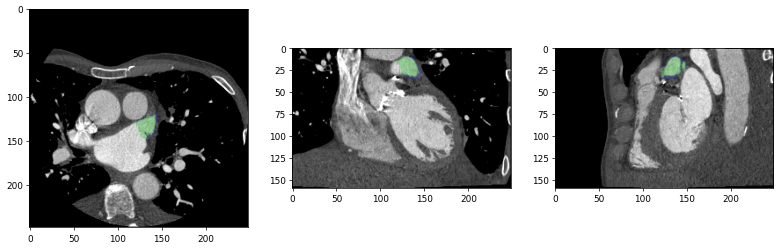

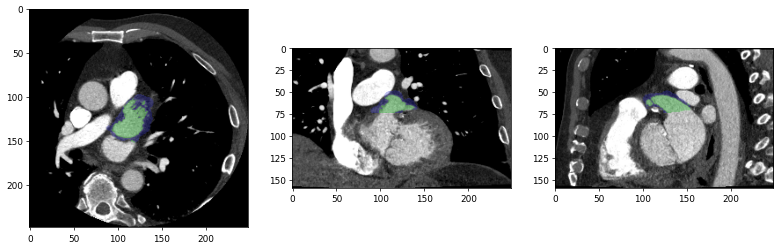

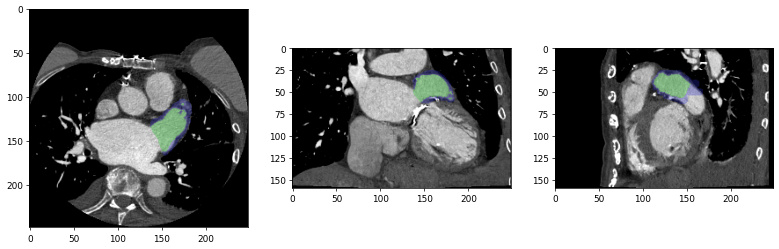

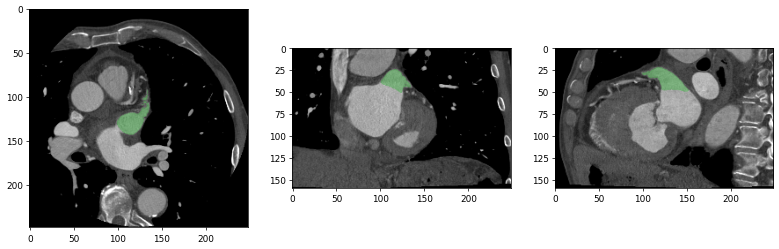

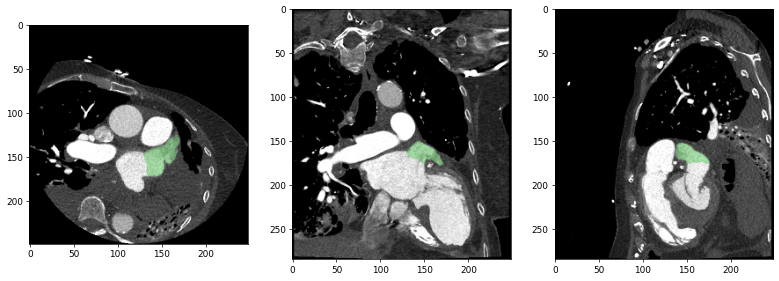

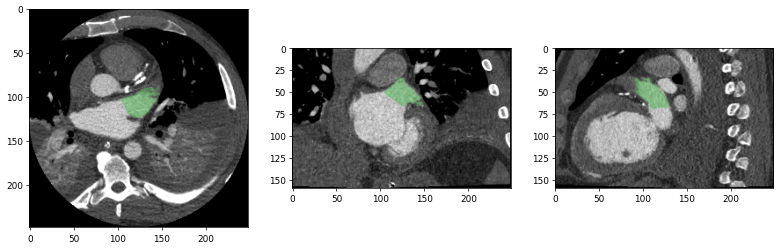

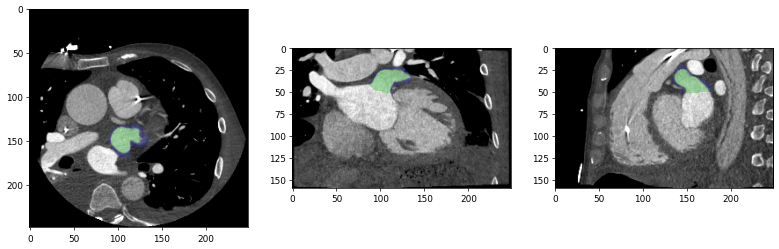

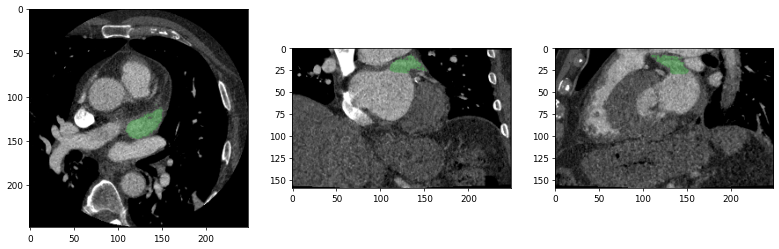

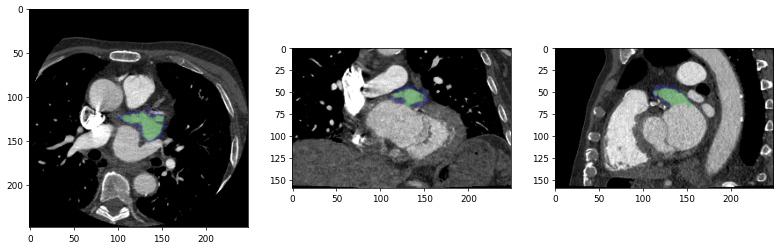

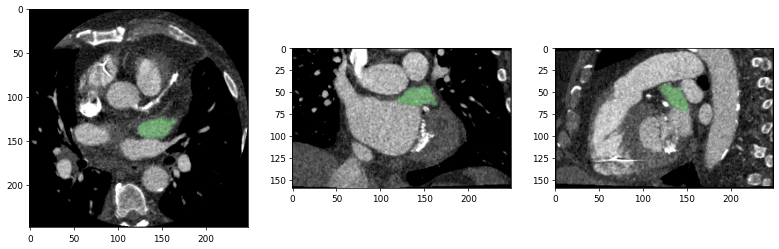

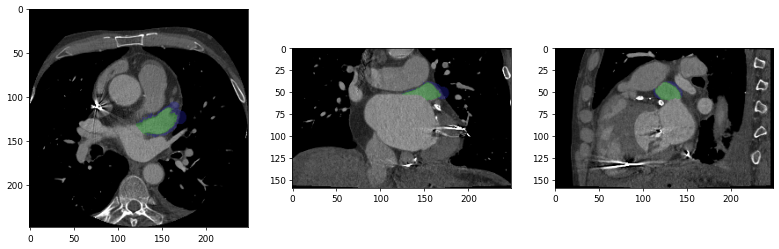

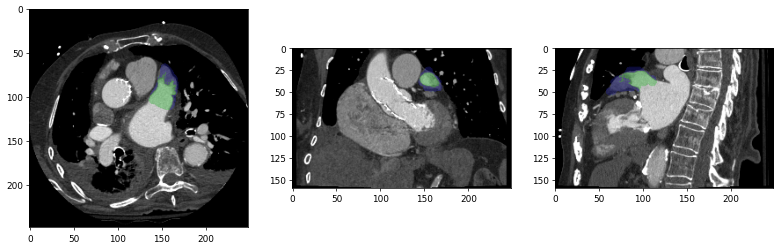

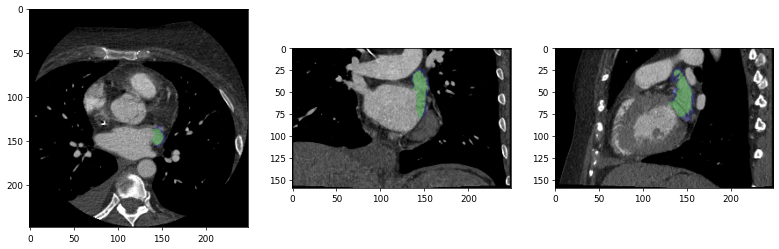

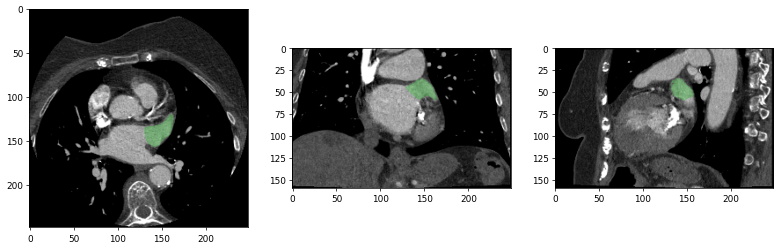

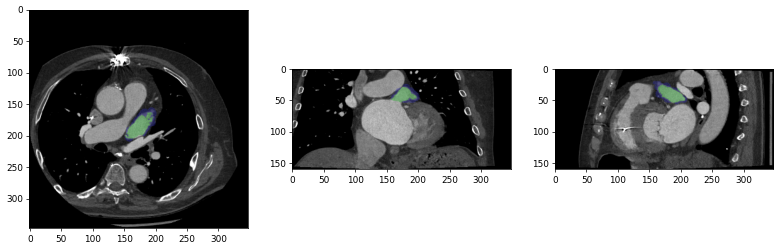

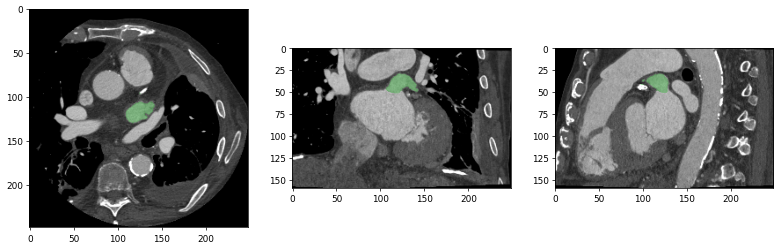

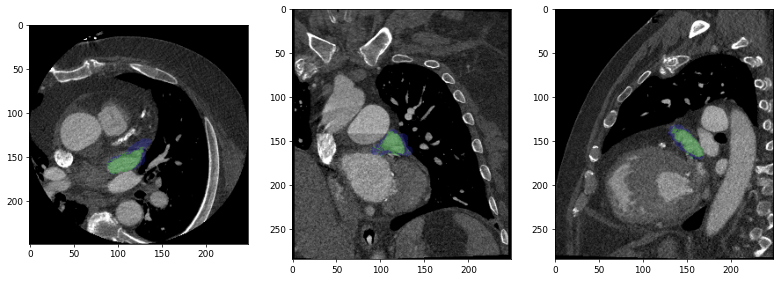

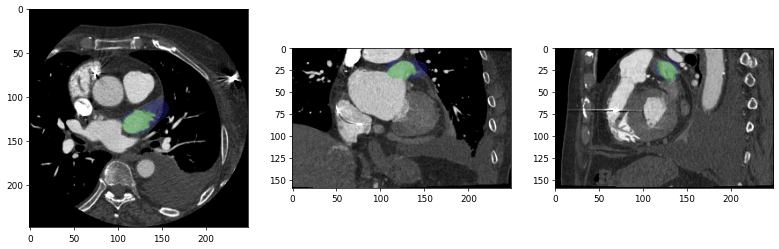

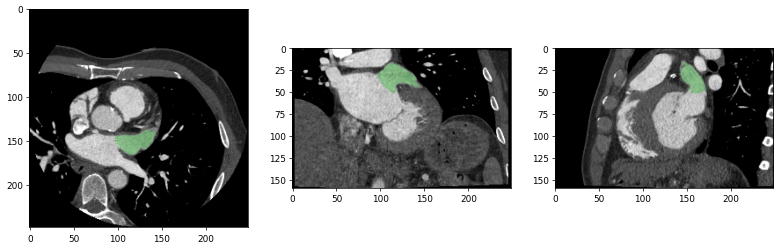

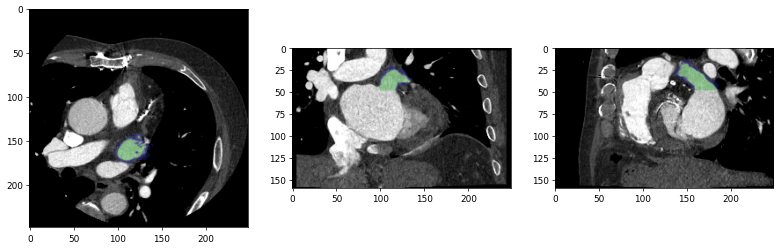

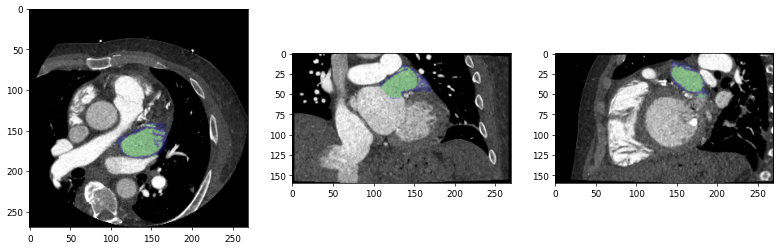

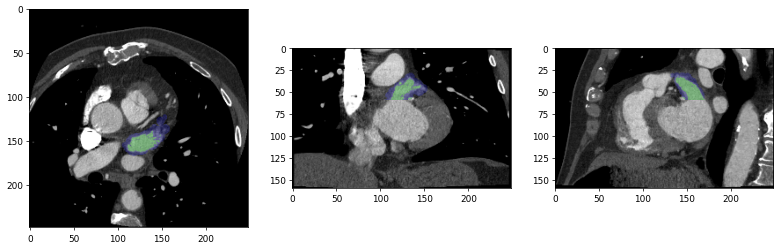

In [24]:
qc_saver = QCSaver()
for file in tqdm(os.listdir(DIR_LABELS)):
    path_ortho = os.path.join(DIR_WRITE, 'orthoviews', file.split('_')[0]+'.png')
    if os.path.exists(path_ortho + '.png'):
        continue
    path_stack = os.path.join(DIR_WRITE, 'stacks', file.split('_')[0])
    image = ReadNifti(os.path.join(DIR_PREPROCESSED, file), value_clip = [-250,750])
    label = ReadNifti(os.path.join(DIR_LABELS, file))
    annotated = ReadImageLabelPair(image, label)
    annotated.viewer.orthoview()
    qc_saver.save(path_ortho, annotated, orthoview=True)
    qc_saver.save(path_stack, annotated, orthoview=False)
    # except:
    #     print(file)

In [ ]:
# multiplanar reconstruction 
# circumflex